In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import re
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
pet_data = pd.read_csv('/content/drive/MyDrive/csv/announceddata.csv', encoding='cp949')
user_data = pd.read_csv('/content/drive/MyDrive/csv/User_ViewData.csv', encoding='cp949')

In [14]:
print(pet_data.shape)
pet_data.head()

(3162, 3)


,noticeNumber,species,colorCd
0,세종-세종-2023-00410,[개] 진도견,흰색
1,세종-세종-2023-00409,[개] 진도견,흰색
2,세종-세종-2023-00408,[개] 믹스견,갈색 얼
3,세종-세종-2023-00407,[개] 믹스견,갈색얼룩
4,세종-세종-2023-00406,[고양이] 한국 고양이,검정


In [16]:
print(user_data.shape)
user_data.head()

(15706, 3)


,userIdx,noticeNumber,numberOfView
0,24,강원-강릉-2023-00500,21
1,24,강원-강릉-2023-00501,18
2,24,강원-강릉-2023-00508,5
3,24,강원-강릉-2023-00510,21
4,24,강원-강릉-2023-00511,1


In [17]:
df_combined = pd.merge(user_data, pet_data, on='noticeNumber')
print(df_combined.shape)
df_combined.head()

(15706, 5)


,userIdx,noticeNumber,numberOfView,species,colorCd
0,24,강원-강릉-2023-00500,21,[고양이] 한국 고양이,흰검
1,25,강원-강릉-2023-00500,7,[고양이] 한국 고양이,흰검
2,27,강원-강릉-2023-00500,5,[고양이] 한국 고양이,흰검
3,28,강원-강릉-2023-00500,17,[고양이] 한국 고양이,흰검
4,29,강원-강릉-2023-00500,18,[고양이] 한국 고양이,흰검


In [24]:
colors = {}
def find_colors():
  for color in pet_data['colorCd']:
    words = color
    for word in words:
      colors[word] = colors.get(word, 0) + 1 # dictionary 안에 word가 없으면 0으로 초기화, 이후 반복되면 + 1

find_colors()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 55152 (\N{HANGUL SYLLABLE HYIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49353 (\N{HANGUL SYLLABLE SAEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44040 (\N{HANGUL SYLLABLE GAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50620 (\N{HANGUL SYLLABLE EOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47337 (\N{HANGUL SYLLABLE RUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

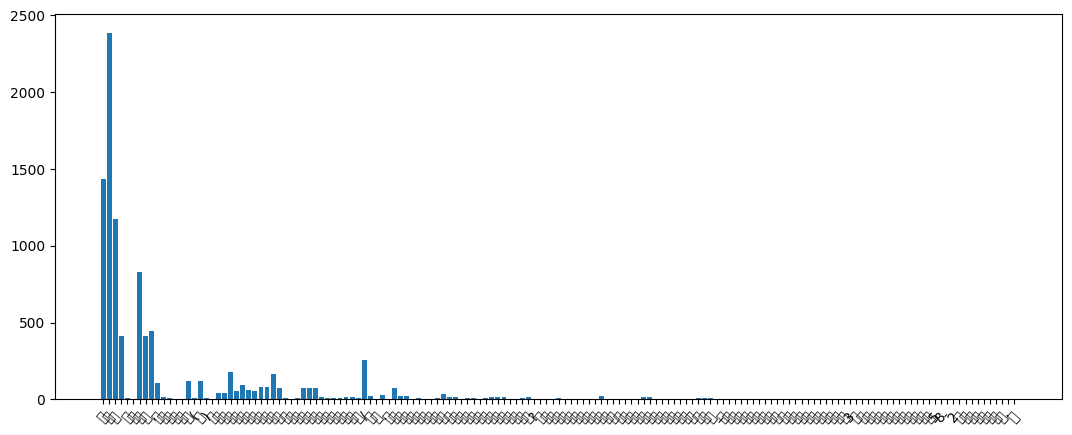

In [25]:
plt.figure(figsize=(13, 5))
key_list = []
value_list = []
for key, value in colors.items():
  key_list.append(key)
  value_list.append(value)
plt.bar(range(len(colors)), value_list)
plt.xticks(range(len(colors)), key_list, rotation=50)
plt.show()

In [41]:
df_click = pd.DataFrame(df_combined.groupby('noticeNumber')['numberOfView'].sum())
df_click['total Views'] = pd.DataFrame(df_combined.groupby('noticeNumber')['numberOfView'].sum())
df_click.rename(columns={'numberOfView': 'sum_view'}, inplace=True)
df_click.sort_values('total Views', ascending=False).head(20)

,sum_view,total Views
noticeNumber,,
전남-무안-2023-00211,159,159
경기-하남-2023-00333,158,158
경기-연천-2023-00337,157,157
제주-제주-2023-02924,151,151
광주-동구-2023-00200,149,149
경기-고양-2023-00654,148,148
경남-사천-2023-00377,147,147
경남-합천-2023-00384,144,144
인천-중구-2023-00508,144,144


<Figure size 800x400 with 0 Axes>

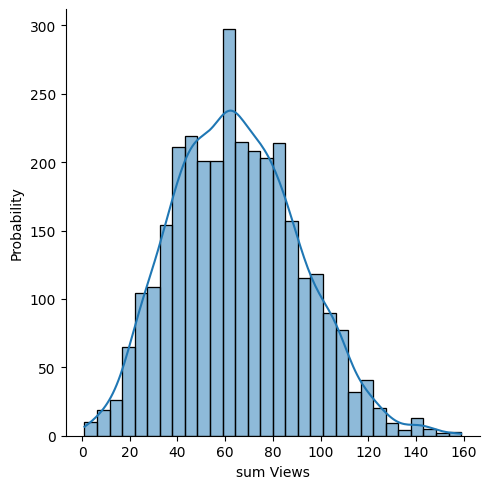

In [43]:
plt.figure(figsize=(8, 4))
sns.displot(df_click['sum_view'], bins=30, kde=True)
plt.xlabel('sum Views')
plt.ylabel('Probability')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47497 (\N{HANGUL SYLLABLE REUNG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fu

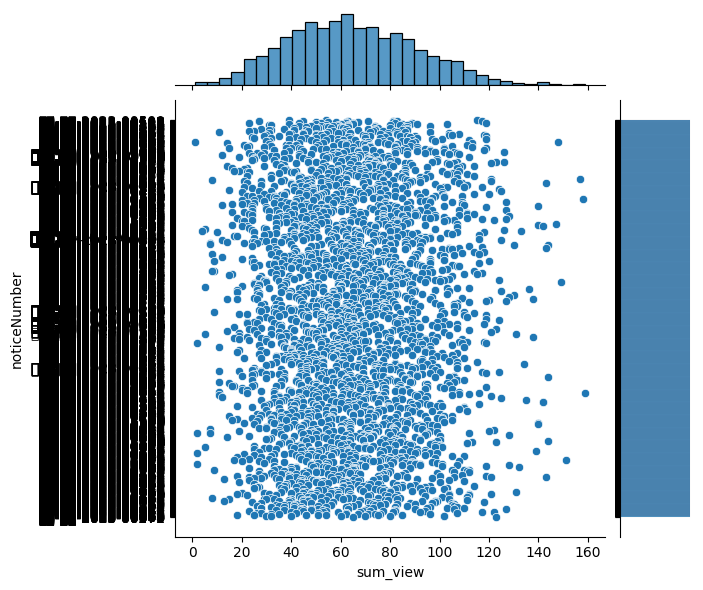

In [48]:
sns.jointplot(x = 'sum_view', y = 'noticeNumber', data = df_click)

In [49]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 15.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=2811602 sha256=184ef98fb4d2606934722e69f8e0d743444b03b2adc92a733fc20437234e8c6a
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [50]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import GridSearchCV, cross_validate

In [ ]:
reader = Reader(rating_scale=(0.5, 5)) # 소수점 없는 평점이라면 (1, 5)
data = Dataset.load_from_df(user_data[['userId', 'movieId', 'rating']], reader=reader)

In [52]:
matrix = df_combined.pivot_table(index='userIdx', columns='noticeNumber', values='numberOfView')

matrix.head(20)

noticeNumber,강원-강릉-2023-00500,강원-강릉-2023-00501,강원-강릉-2023-00502,강원-강릉-2023-00503,강원-강릉-2023-00507,강원-강릉-2023-00508,강원-강릉-2023-00509,강원-강릉-2023-00510,강원-강릉-2023-00511,강원-강릉-2023-00512,...,충북-청주-2023-00864,충북-청주-2023-00865,충북-청주-2023-00866,충북-청주-2023-00868,충북-청주-2023-00869,충북-충주-2023-00270,충북-충주-2023-00271,충북-충주-2023-00272,충북-충주-2023-00273,충북-충주-2023-00274
userIdx,,,,,,,,,,,,,,,,,,,,,
24,21.0,18.0,NaN,NaN,NaN,5.0,NaN,21.0,1.0,NaN,...,18.0,15.0,9.0,4.0,NaN,NaN,20.0,NaN,NaN,20.0
25,7.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,25.0,...,22.0,NaN,NaN,9.0,NaN,16.0,14.0,23.0,5.0,4.0
26,NaN,3.0,21.0,4.0,9.0,NaN,21.0,NaN,10.0,NaN,...,NaN,17.0,17.0,NaN,NaN,4.0,2.0,25.0,NaN,20.0
27,5.0,1.0,NaN,NaN,6.0,NaN,20.0,17.0,NaN,NaN,...,25.0,24.0,NaN,20.0,NaN,NaN,NaN,3.0,NaN,25.0
28,17.0,16.0,8.0,NaN,15.0,15.0,NaN,NaN,16.0,25.0,...,NaN,NaN,NaN,NaN,NaN,15.0,NaN,23.0,NaN,NaN
29,18.0,NaN,25.0,15.0,4.0,22.0,19.0,9.0,NaN,16.0,...,NaN,5.0,NaN,NaN,NaN,12.0,4.0,NaN,20.0,19.0
30,19.0,1.0,NaN,8.0,24.0,2.0,NaN,NaN,NaN,NaN,...,NaN,22.0,NaN,2.0,NaN,4.0,14.0,7.0,18.0,5.0
31,12.0,NaN,NaN,NaN,NaN,NaN,11.0,13.0,NaN,NaN,...,NaN,19.0,NaN,NaN,11.0,NaN,NaN,NaN,NaN,17.0
32,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,...,5.0,NaN,NaN,NaN,NaN,9.0,8.0,NaN,NaN,NaN


In [57]:
COLOR_WEIGHT = 0.1

def pearsonR(s1, s2):
    s1_c = s1 - s1.mean()
    s2_c = s2 - s2.mean()
    return np.sum(s1_c * s2_c) / np.sqrt(np.sum(s1_c ** 2) * np.sum(s2_c ** 2))

def recommend(input_pet, matrix, n, similar_color=True):
    input_colors = pet_data[pet_data['noticeNumber'] == input_pet]['colorCd'].iloc(0)[0]

    result = []
    for type in matrix.columns:
        if type == input_pet:
            continue

        # rating comparison
        cor = pearsonR(matrix[input_pet], matrix[type])

        # genre comparison
        if similar_color and len(input_colors) > 0:
            temp_colors = pet_data[pet_data['noticeNumber'] == type]['colorCd'].iloc(0)[0]

            same_count = np.sum(np.isin(input_colors, temp_colors))
            cor += (COLOR_WEIGHT * same_count)

        if np.isnan(cor):
            continue
        else:
            result.append((type, '{:.2f}'.format(cor), temp_colors))

    result.sort(key=lambda r: r[1], reverse=True)

    return result[:n]

In [59]:
recommend_result = recommend('충북-충주-2023-00270', matrix, 10, similar_color=True)

pd.DataFrame(recommend_result, columns = ['Type', 'Correlation', 'Colors'])

<ipython-input-57-fd845af2dc99>:6: RuntimeWarning: invalid value encountered in double_scalars
  return np.sum(s1_c * s2_c) / np.sqrt(np.sum(s1_c ** 2) * np.sum(s2_c ** 2))


,Type,Correlation,Colors
0,경북-봉화-2023-00042,0.96,갈색
1,서울-마포-2023-00206,0.95,고등어
2,충북-옥천-2023-00411,0.95,황색
3,대전-동구-2023-00290,0.93,백색
4,경북-영덕-2023-00193,0.89,"갈색,흰색"
5,서울-도봉-2023-00126,0.83,갈/검/줄
6,대구-달성-2023-00485,0.82,백
7,충남-금산-2023-00129,0.80,흰색
8,전북-남원-2023-00444,0.79,흑갈색
9,경기-파주-2023-00741,0.78,흰/갈/검
